In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [76]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

## ¿Cuáles son las especies fósiles más comunes en cada una de las tres regiones (Chile, Argentina y Antártida)?

### Chile


C:\Users\octah\AppData\Local\Temp\ipykernel_3144\1417058222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')


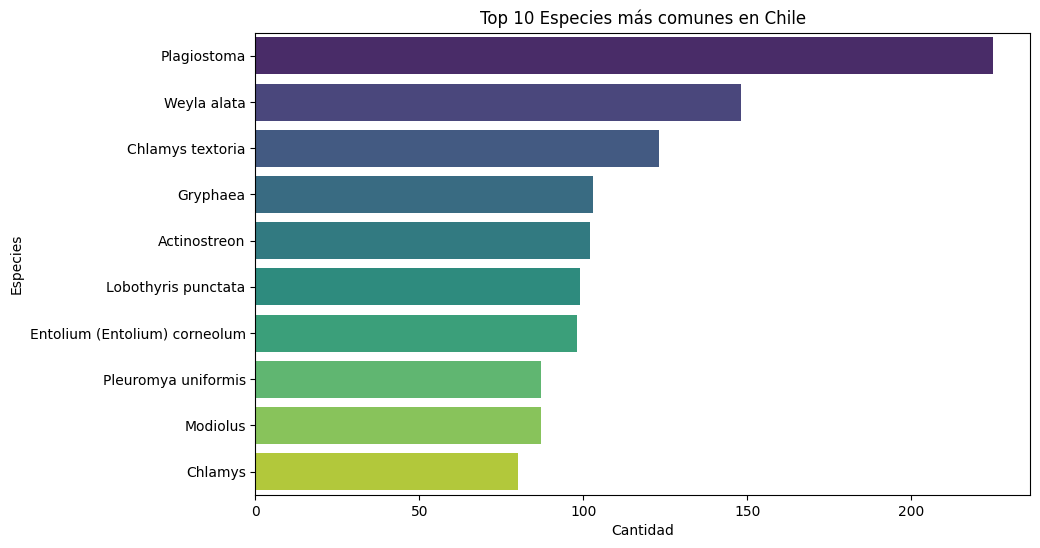

In [77]:
#Hagamos un grafico con las top 10 especies mas comunes en cada region

top_10_especies_chile = chile_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Chile')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()




### Argentina


C:\Users\octah\AppData\Local\Temp\ipykernel_3144\3176372099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')


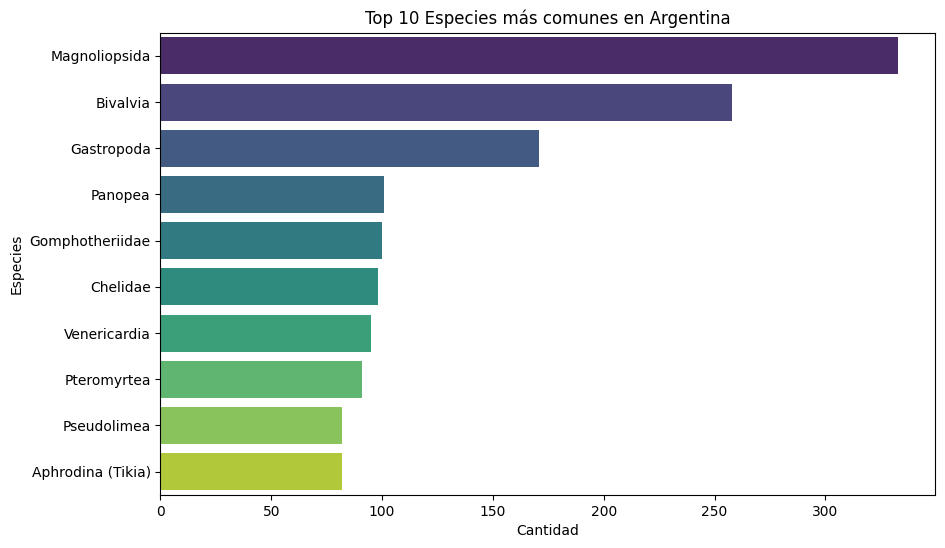

In [78]:
top_10_especies_argentina = argentina_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Argentina')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

### Antártida

C:\Users\octah\AppData\Local\Temp\ipykernel_3144\1893660038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')


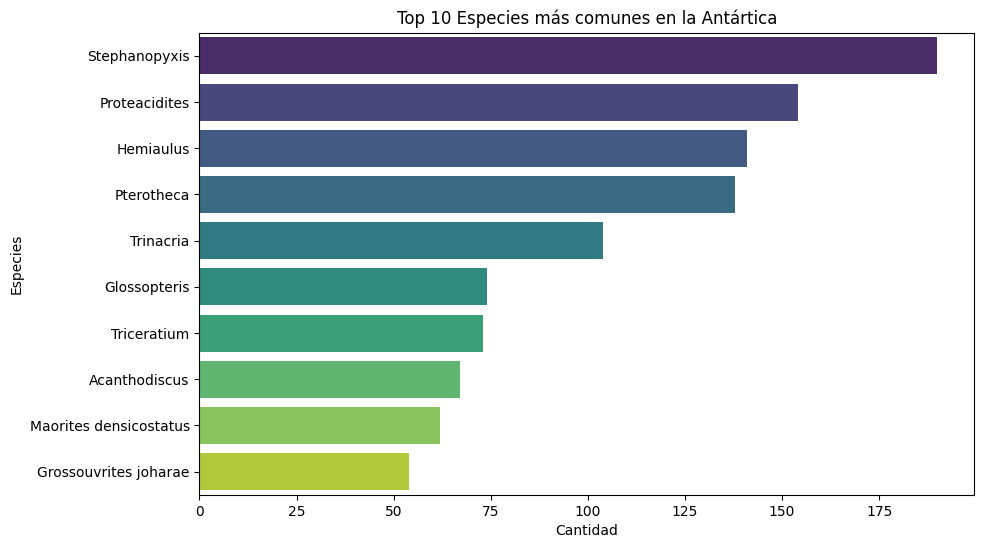

In [79]:
top_10_especies_antartica = antartica_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')
plt.title('Top 10 Especies más comunes en la Antártica')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

###  **Comparación de las especies fósiles más comunes entre regiones**

### **Enfoque del análisis**
Para identificar similitudes y diferencias entre las especies fósiles más comunes en Chile, Argentina y Antártida, realizaremos una comparación basada en sus características taxonómicas y ambientales.

### **Aspectos a comparar**
1. **Ambiente (`environment`)**:
   - Analizaremos en qué tipo de ambiente (acuático, terrestre, marino, etc.) se encuentran las especies más comunes en cada región.
   - Esto nos ayudará a entender la distribución ecológica y los hábitats predominantes en cada región.

2. **Familia (`family`)**:
   - Compararemos las familias a las que pertenecen las especies más comunes, para identificar si hay similitudes en términos de taxonomía general entre las regiones.

3. **Género (`genus`)**:
   - Evaluaremos si las especies más comunes pertenecen a géneros similares, lo que indicaría una conexión taxonómica más específica entre las regiones.

4. **Orden (`order`)**:
   - Investigaremos si las especies más comunes comparten un orden similar, proporcionando un nivel intermedio de comparación taxonómica entre las familias y las clases.

5. **Clase (`class`)**:
   - Examinaremos si las especies más comunes pertenecen a las mismas clases, lo que indicaría similitudes más amplias entre los grupos taxonómicos.

6. **Filo (`phylum`)**:
   - Compararemos los filos a los que pertenecen las especies más comunes, para observar patrones a un nivel taxonómico más general.

7. **Distribución por era (`era_early`)**:
   - Compararemos cómo se distribuyen las especies más comunes a lo largo de las eras geológicas, para identificar si hay eras dominantes en cada región.

---

Antes importante recordar los niveles taxonomicos

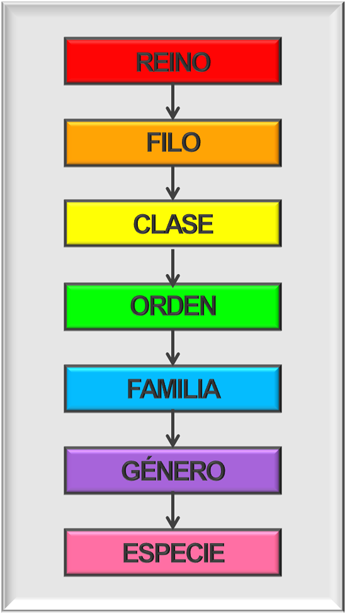

In [80]:
from IPython.display import Image
Image(filename=r'data\img\tax.png')

### **Ambiente (`environment`)**

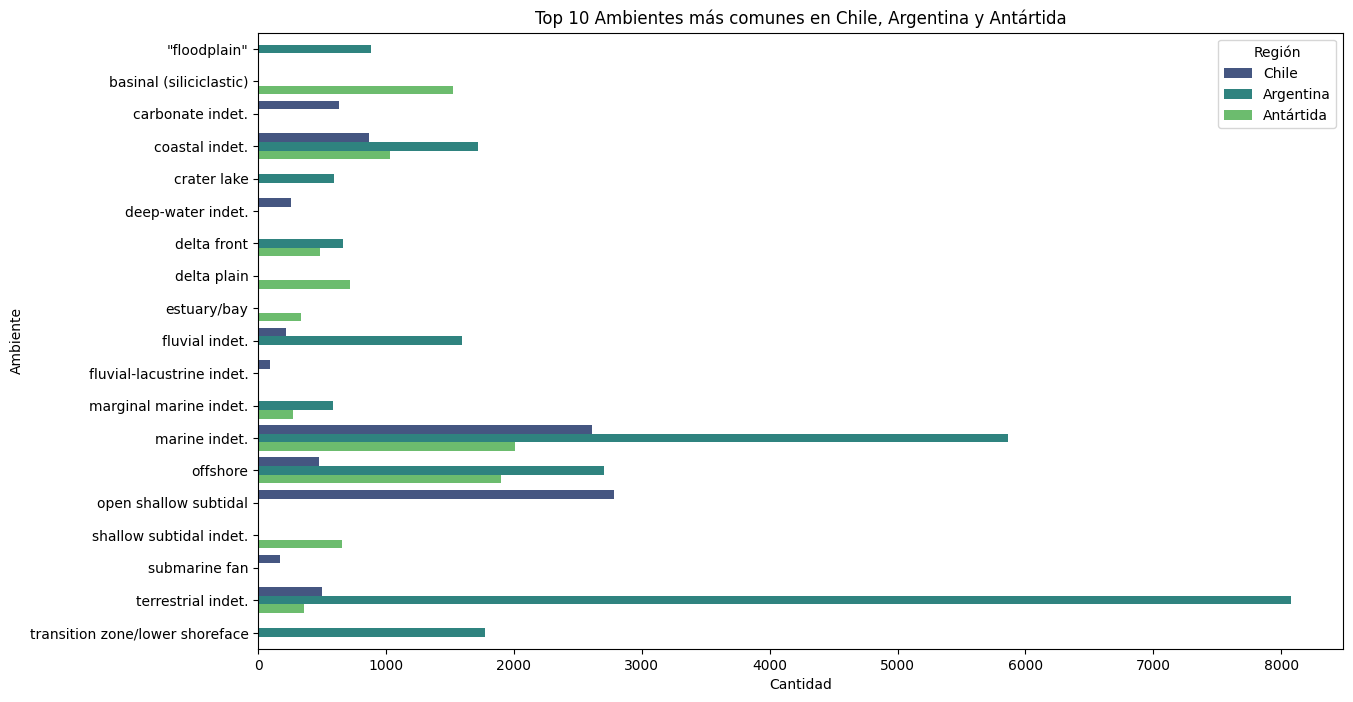

In [81]:
#Ahora hagamos un grafico comparativo de las 10 especies mas comunes en cada region pero con enfoque en enviroment

# Obtener los top 10 ambientes más comunes en cada región
top_10_especies_chile_enviroment = chile_df['environment'].value_counts().head(10)
top_10_especies_argentina_enviroment = argentina_df['environment'].value_counts().head(10)
top_10_especies_antartica_enviroment = antartica_df['environment'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_enviroment,
    'Argentina': top_10_especies_argentina_enviroment,
    'Antártida': top_10_especies_antartica_enviroment
}).fillna(0)



# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='environment', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='environment', hue='Región', palette='viridis')
plt.title('Top 10 Ambientes más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Ambiente')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Predominio de ambientes acuáticos**:
   - La mayoría de las especies fósiles más comunes en las tres regiones están asociadas a ambientes acuáticos, como *marine indet.*, *offshore*, y *open shallow subtidal*. 
   - Esto sugiere que los ecosistemas acuáticos han sido un entorno dominante para la preservación y evolución de la biodiversidad fósil en estas regiones.

2. **Diferencias entre regiones**:
   - **Argentina** muestra una alta proporción de especies asociadas a ambientes *fluvial indet.* y *terrestrial indet.*, indicando una mayor diversidad de ambientes continentales.
   - **Chile** tiene una dominancia notable en ambientes *marine indet.* y *offshore*, lo que refuerza su orientación hacia ecosistemas marinos.
   - **Antártida** presenta una contribución más equilibrada, aunque con mayor énfasis en ambientes como *marginal marine indet.* y *offshore*, lo que podría reflejar su pasado geológico vinculado a mares someros.

3. **Importancia de ambientes transicionales**:
   - En todas las regiones, ambientes como *transition zone/lower shoreface* y *marginal marine indet.* destacan como importantes para la biodiversidad fósil, representando ecosistemas transicionales entre lo marino y lo continental.

4. **Conclusión general**:
   - La predominancia de ambientes acuáticos destaca la importancia de estos ecosistemas en la preservación fósil, pero también refleja las diferencias ecológicas y geográficas particulares de cada región.


### **Género (`genus`)**

In [82]:
chile_df_genus = chile_df[chile_df['genus'] != 'NO_GENUS_SPECIFIED']
argentina_df_genus = argentina_df[argentina_df['genus'] != 'NO_GENUS_SPECIFIED']
antartica_df_genus = antartica_df[antartica_df['genus'] != 'NO_GENUS_SPECIFIED']

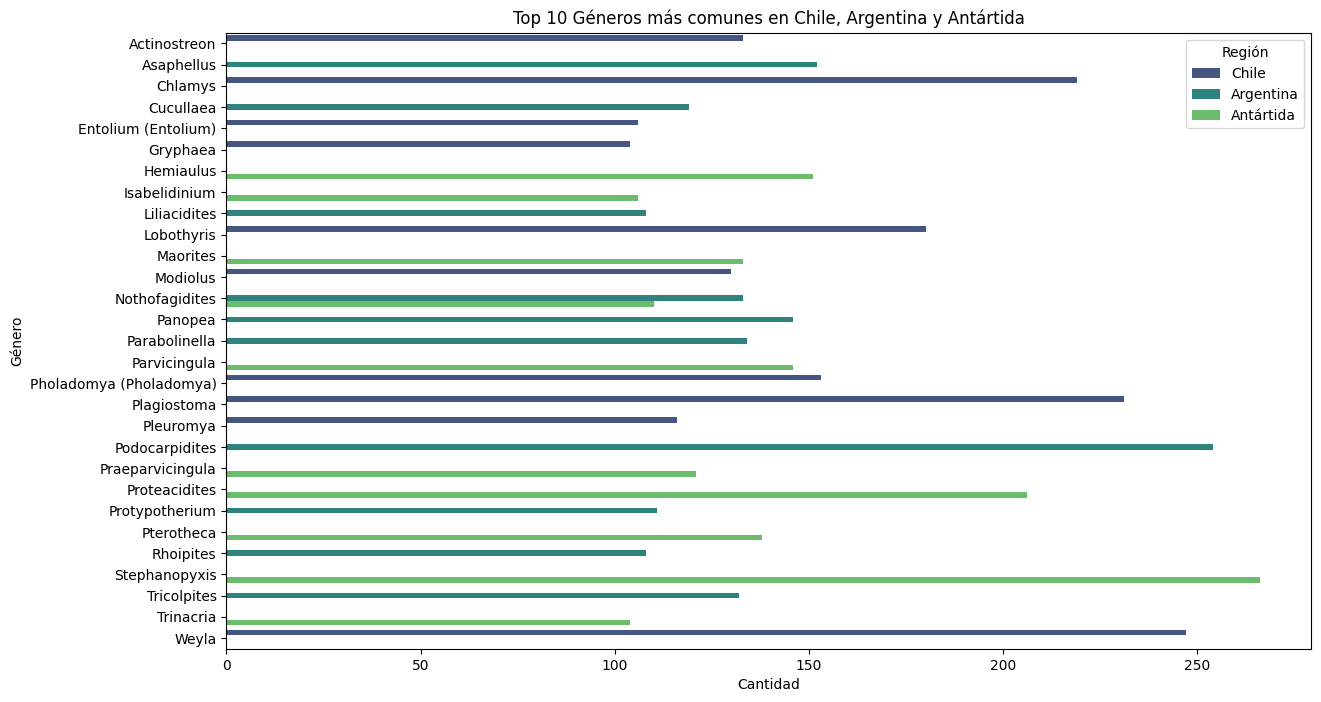

In [83]:
#Ahora hagaos lo mismo pero con genus

# Obtener los top 10 generos más comunes en cada región
top_10_especies_chile_genus = chile_df_genus['genus'].value_counts().head(10)
top_10_especies_argentina_genus = argentina_df_genus['genus'].value_counts().head(10)
top_10_especies_antartica_genus = antartica_df_genus['genus'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_genus,
    'Argentina': top_10_especies_argentina_genus,
    'Antártida': top_10_especies_antartica_genus
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='genus', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='genus', hue='Región', palette='viridis')
plt.title('Top 10 Géneros más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Géneros compartidos entre regiones**:
   - **Argentina y Antártida**:
     - *Nothofagidites* (restos de polen de Nothofagus, "árboles de haya del sur"): Representa ecosistemas terrestres con conexión evolutiva en áreas del hemisferio sur, destacando en ambientes fríos o templados.

2. **Géneros más abundantes por región**:
   - **Argentina**:
     - *Proteacidites* (restos de polen de la familia Proteaceae): Asociados a ecosistemas terrestres templados y secos.
     - *Parvicinctula* (microalgas diatomeas): Indicadoras de ambientes marinos y lacustres.
   - **Chile**:
     - *Pholadomya* (moluscos bivalvos fósiles): Representativos de ecosistemas marinos profundos y estuarios.
     - *Lobothyris* (braquiópodos marinos con conchas): Comunes en ambientes marinos.
   - **Antártida**:
     - *Trinacria* (diatomeas fósiles): Indicadoras de aguas frías y ricas en nutrientes.
     - *Stephanozyxis* (microalgas diatomeas): Asociadas a ambientes marinos polares.

3. **Patrones generales**:
   - Argentina y Antártida comparten *Nothofagidites*, reflejando una conexión evolutiva en ecosistemas terrestres dominados por Nothofagus en el pasado.
   - Chile se diferencia por géneros predominantemente marinos, mientras que Argentina combina géneros terrestres y acuáticos, y Antártida se especializa en microalgas marinas adaptadas al frío.

4. **Conclusión general**:
   - La distribución de géneros resalta las características ecológicas únicas de cada región: ecosistemas marinos profundos en Chile, una mezcla de terrestres y marinos en Argentina, y una dominancia de géneros adaptados al frío en Antártida.


### **Familia (`family`)**

In [84]:
#Primero dropiemos aquellas columnas con NO_FAMILY_SPECIFIED pero usando df nuevos para no modificar los originales

chile_df_family = chile_df[chile_df['family'] != 'NO_FAMILY_SPECIFIED']
argentina_df_family = argentina_df[argentina_df['family'] != 'NO_FAMILY_SPECIFIED']
antartica_df_family = antartica_df[antartica_df['family'] != 'NO_FAMILY_SPECIFIED']


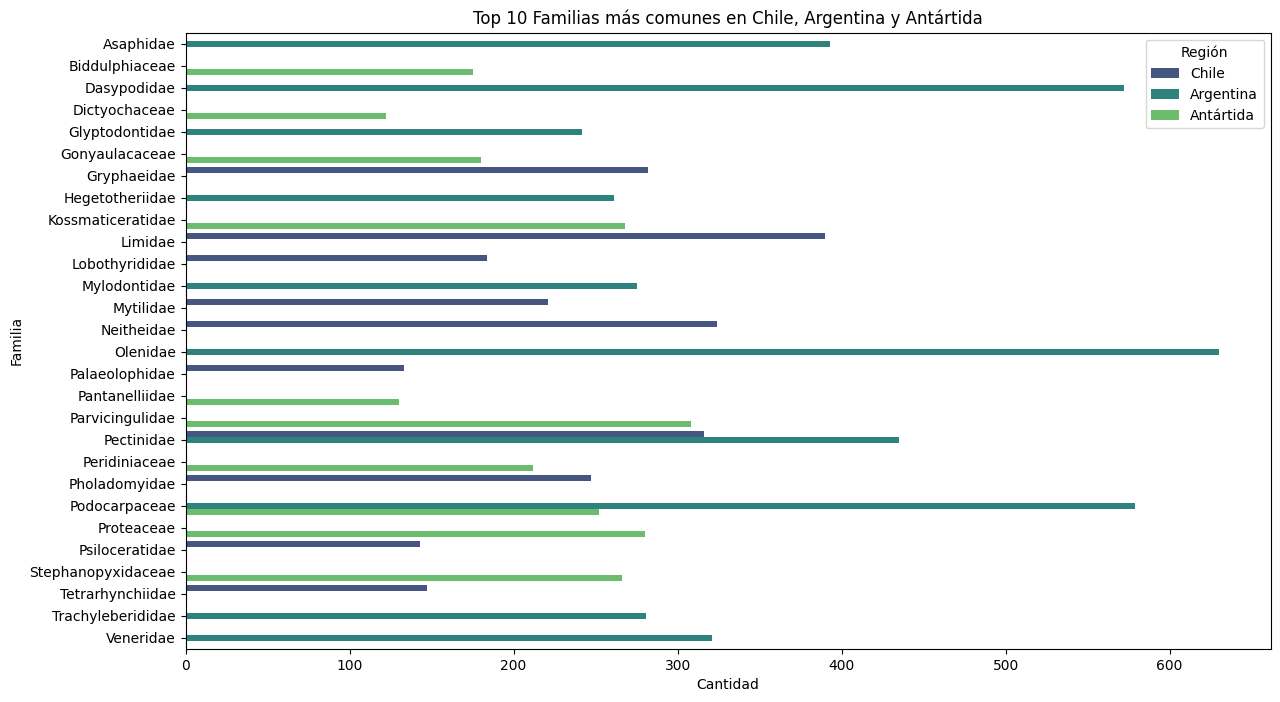

In [85]:
#Ahora hagamos lo mismo pero con familia

# Obtener los top 10 familias más comunes en cada región
top_10_especies_chile_family = chile_df_family['family'].value_counts().head(10)
top_10_especies_argentina_family = argentina_df_family['family'].value_counts().head(10)
top_10_especies_antartica_family = antartica_df_family['family'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_family,
    'Argentina': top_10_especies_argentina_family,
    'Antártida': top_10_especies_antartica_family
}).fillna(0)


# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='family', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='family', hue='Región', palette='viridis')
plt.title('Top 10 Familias más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Familia')
plt.legend(title='Región')
plt.show()

### Observaciones


1. **Familias compartidas entre las regiones**:
   - **Argentina y Antártida**:
     - *Podocarpaceae* (plantas gimnospermas como los pinos): Asociadas a ecosistemas terrestres fríos y templados. Reflejan la conexión evolutiva en ecosistemas terrestres del hemisferio sur.
   - **Chile y Argentina**:
     - *Pectinidae* (moluscos bivalvos como vieiras): Comunes en ambientes marinos someros y costeros, reflejando la importancia de ecosistemas acuáticos compartidos.

2. **Familias con alta abundancia en cada región**:
   - **Argentina**:
     - *Podocarpaceae* (plantas gimnospermas como los pinos): Alta representación en ecosistemas terrestres.
     - *Proteaceae* (plantas angiospermas como proteas): Indicativas de ecosistemas áridos o templados.
   - **Chile**:
     - *Lobothyrididae* (braquiópodos marinos con conchas): Característicos de ambientes marinos profundos.
     - *Limidae* (ostras de fuego, moluscos bivalvos): Muy abundantes en aguas marinas poco profundas.
   - **Antártida**:
     - *Dictyochaecae* (microalgas silíceas): Indicadoras de aguas frías y ricas en nutrientes.
     - *Pantanelliidae* (radiolarios, microfósiles marinos): Asociados a profundidades marinas frías.


4. **Conclusión general**:
   - Las familias compartidas, como *Podocarpaceae* entre Argentina y Antártida y *Pectinidae* entre Chile y Argentina, reflejan conexiones evolutivas específicas y ecosistemas comunes.
   - Las diferencias en las familias más abundantes destacan la diversidad ecológica y geográfica de cada región: ambientes terrestres predominan en Argentina, ecosistemas marinos son clave en Chile, y Antártida muestra un equilibrio entre ecosistemas marinos y lacustres.


### **Orden (`order`)**

In [86]:

chile_df_order = chile_df[chile_df['order'] != 'NO_ORDER_SPECIFIED']
argentina_df_order = argentina_df[argentina_df['order'] != 'NO_ORDER_SPECIFIED']
antartica_df_order = antartica_df[antartica_df['order'] != 'NO_ORDER_SPECIFIED']

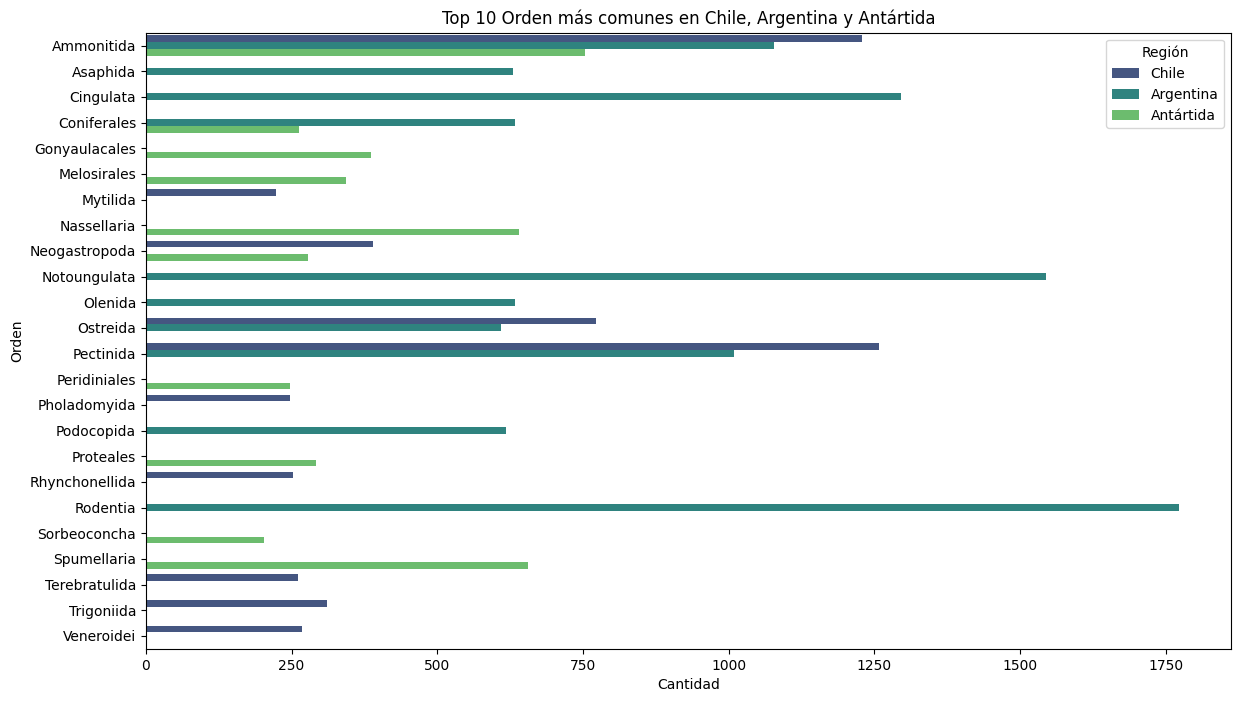

In [87]:
#Hagamos lo mismo para order
#Primero dropiemos aquellas columnas con NO_ORDER_SPECIFIED pero usando df nuevos para no modificar los originales


# Obtener los top 10 order más comunes en cada región
top_10_especies_chile_order = chile_df_order['order'].value_counts().head(10)
top_10_especies_argentina_order = argentina_df_order['order'].value_counts().head(10)
top_10_especies_antartica_order = antartica_df_order['order'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_order,
    'Argentina': top_10_especies_argentina_order,
    'Antártida': top_10_especies_antartica_order
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='order', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='order', hue='Región', palette='viridis')
plt.title('Top 10 Orden más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Orden')
plt.legend(title='Región')
plt.show()




### Observaciones

1. **Órdenes compartidos entre regiones**:
   - *Ammonitida* (ammonites, moluscos marinos extintos): Presente en las tres regiones, refuerza la importancia de los ecosistemas marinos antiguos como un hábitat clave.
   - *Pectinida* (vieiras, moluscos bivalvos): Observado en Chile y Argentina, representa ambientes marinos someros.
   - *Podocopida* (ostrácodos, pequeños crustáceos): Compartido entre Argentina y Antártida, refleja ambientes acuáticos con una amplia adaptabilidad, desde lagos hasta mares.
   - *Ostreida* (ostras, moluscos bivalvos): Compartido entre Chile y Argentina, se asocia con ecosistemas marinos someros y estuarios.

2. **Órdenes dominantes por región**:
   - **Chile**:
     - *Ostreida* (ostras, moluscos bivalvos): Dominante en ambientes marinos someros y estuarios.
     - *Terebratulida* (braquiópodos): Representativos de ecosistemas marinos profundos.
   - **Argentina**:
     - *Notoungulata* (mamíferos ungulados terrestres extintos): Refleja ecosistemas terrestres únicos y distintivos del continente sudamericano.
     - *Coniferales* (árboles de coníferas): Muestra la diversidad de ecosistemas terrestres forestales.
     - *Ostreida* (ostras, moluscos bivalvos): Importante en ambientes marinos someros, comparte dominancia con Chile.
   - **Antártida**:
     - *Melosirales* (diatomeas fósiles): Asociadas a aguas frías y ricas en nutrientes, representan el predominio de ambientes marinos polares.
     - *Spumellaria* (radiolarios): Indicadores de ambientes marinos profundos.

3. **Patrones generales**:
   - Chile se destaca por una biodiversidad fósil marina más pronunciada, con órdenes como *Ostreida* y *Terebratulida*.
   - Argentina combina ecosistemas terrestres y acuáticos, reflejados en *Notoungulata* y *Pectinida*, mientras comparte *Ostreida* con Chile.
   - Antártida presenta un predominio de microfósiles marinos adaptados a aguas frías, como *Melosirales* y *Spumellaria*.

4. **Conclusión general**:
   - Los órdenes más comunes en cada región resaltan las diferencias ecológicas: ambientes marinos en Chile, una mezcla de terrestres y marinos en Argentina, y una especialización en ambientes fríos en Antártida.
   - Los órdenes compartidos reflejan conexiones evolutivas y ecológicas entre estas regiones en el pasado geológico.


### **Clase (`class`)**

In [88]:
chile_df_class = chile_df[chile_df['class'] != 'NO_CLASS_SPECIFIED']
argentina_df_class = argentina_df[argentina_df['class'] != 'NO_CLASS_SPECIFIED']
antartica_df_class = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']

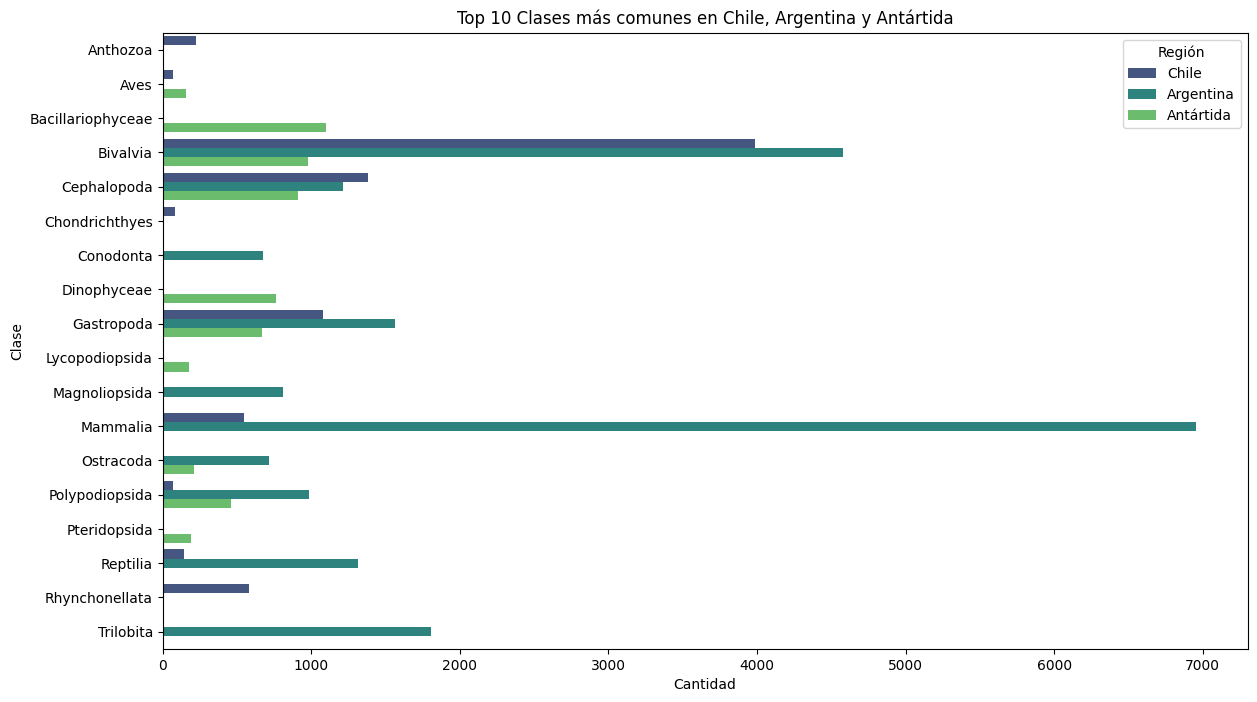

In [89]:
top_10_especies_chile_class = chile_df_class['class'].value_counts().head(10)
top_10_especies_argentina_class = argentina_df_class['class'].value_counts().head(10)
top_10_especies_antartica_class = antartica_df_class['class'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_class,
    'Argentina': top_10_especies_argentina_class,
    'Antártida': top_10_especies_antartica_class
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='class', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='class', hue='Región', palette='viridis')
plt.title('Top 10 Clases más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.legend(title='Región')
plt.show()




### Observaciones

1. **Clases compartidas entre regiones**:
   - *Bivalvia* (moluscos bivalvos, como almejas y ostras): Presente en las tres regiones, destaca como la clase más abundante, reflejando la importancia de ambientes marinos en cada una.
   - *Gastropoda* (moluscos gasterópodos, como caracoles): Compartida entre todas las regiones, muestra una amplia distribución en ambientes marinos y terrestres.
   - *Cephalopoda* (moluscos cefalópodos, como calamares y nautilos): Representada en las tres regiones, subraya la conectividad de los ecosistemas marinos entre Chile, Argentina y Antártida.
   - *Polypodiopsida* (helechos): Presente en las tres regiones, evidencia ambientes húmedos o terrestres que favorecen la flora vascular.

2. **Clases dominantes por región**:
   - **Chile**:
     - *Bivalvia*, *Cephalopoda* y *Rhynchonellata* (braquiópodos marinos) son las clases más representativas, reflejando una biodiversidad marina bien establecida.
     - *Dinophyceae* (dinoflagelados, protistas): Sugiere la presencia de microfósiles marinos.
   - **Argentina**:
     - *Mammalia* (mamíferos): Es la clase más abundante, destacando ecosistemas terrestres con una alta diversidad de mamíferos fósiles.
     - *Magnoliopsida* (plantas con flores): Refleja ambientes terrestres dominados por flora vascular.
     - *Cephalopoda*: Representa una biodiversidad marina significativa.
   - **Antártida**:
     - *Bivalvia*, *Cephalopoda* y *Bacillariophyceae* (diatomeas): Destacan por su conexión con ecosistemas marinos polares.
     - *Ostracoda* (ostrácodos, pequeños crustáceos): Representa ambientes acuáticos polares.

3. **Patrones generales**:
   - Chile y Antártida están marcadas por una biodiversidad fósil mayormente marina, mientras que Argentina combina ecosistemas marinos y terrestres, siendo dominante en clases terrestres como *Mammalia*.
   - La presencia de *Gastropoda*, *Bivalvia*, *Cephalopoda* y *Polypodiopsida* en todas las regiones refleja una conectividad evolutiva y ecológica significativa entre los ecosistemas.


### **Filo (`phylum`)**

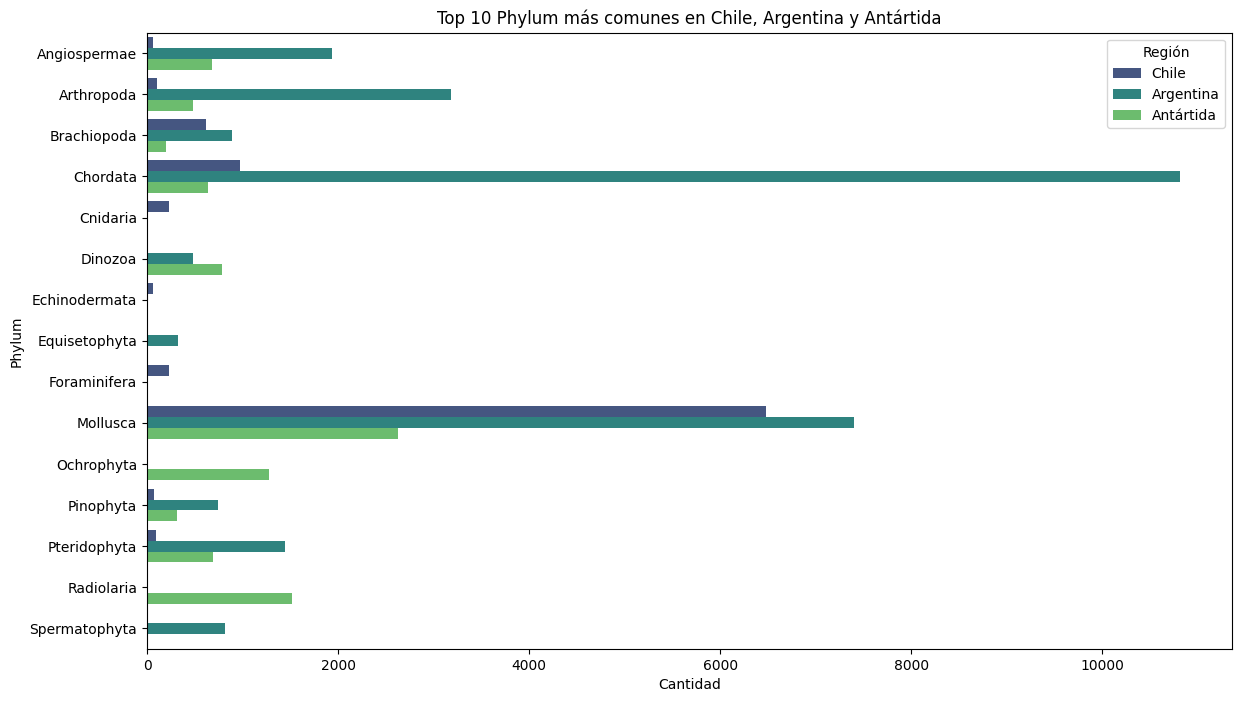

In [90]:
#Hagamos lo mismo para phylum

chile_df_phylum = chile_df[chile_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
argentina_df_phylum = argentina_df[argentina_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
antartica_df_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']

# Obtener los top 10 phylum más comunes en cada región
top_10_especies_chile_phylum = chile_df_phylum['phylum'].value_counts().head(10)
top_10_especies_argentina_phylum = argentina_df_phylum['phylum'].value_counts().head(10)
top_10_especies_antartica_phylum = antartica_df_phylum['phylum'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_phylum,
    'Argentina': top_10_especies_argentina_phylum,
    'Antártida': top_10_especies_antartica_phylum
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='phylum', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='phylum', hue='Región', palette='viridis')
plt.title('Top 10 Phylum más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Phylum')
plt.legend(title='Región')
plt.show()



### Observaciones

1. **Phylum compartidos entre regiones**:
   - **Mollusca** (moluscos): Es el phylum más representativo en todas las regiones, con una clara dominancia tanto en ambientes marinos como terrestres.
   - **Chordata** (cordados, incluyendo vertebrados): Amplia representación en Argentina y Antártida, reflejando la biodiversidad de organismos vertebrados fósiles.
   - **Arthropoda** (artrópodos): Presente en todas las regiones, asociándose a ecosistemas marinos y terrestres.

2. **Phylum específicos por región**:
   - **Chile**:
     - Alta representación de **Brachiopoda** (braquiópodos), indicando una biodiversidad marina especializada.
     - **Foraminifera** (protistas marinos): Reflejan una rica biodiversidad en ambientes acuáticos.
   - **Argentina**:
     - Dominancia de **Chordata**, con una alta diversidad de vertebrados fósiles, particularmente mamíferos.
     - **Pinophyta** y **Pteridophyta** (plantas vasculares): Sugieren ecosistemas terrestres dominados por flora.
   - **Antártida**:
     - Representación significativa de **Radiolaria** (protistas marinos), indicando ambientes acuáticos profundos y polares.
     - **Ochrophyta** (algas marrones): Asociadas a ambientes marinos polares.

3. **Patrones generales**:
   - **Mollusca** y **Chordata** sobresalen como los phylum más diversos y dominantes, reflejando una conectividad evolutiva entre las regiones.
   - Chile y Antártida tienen una biodiversidad fósil dominada por phylum marinos, mientras que Argentina combina ecosistemas terrestres y acuáticos.


### **Distribución por era (`era_early`)**

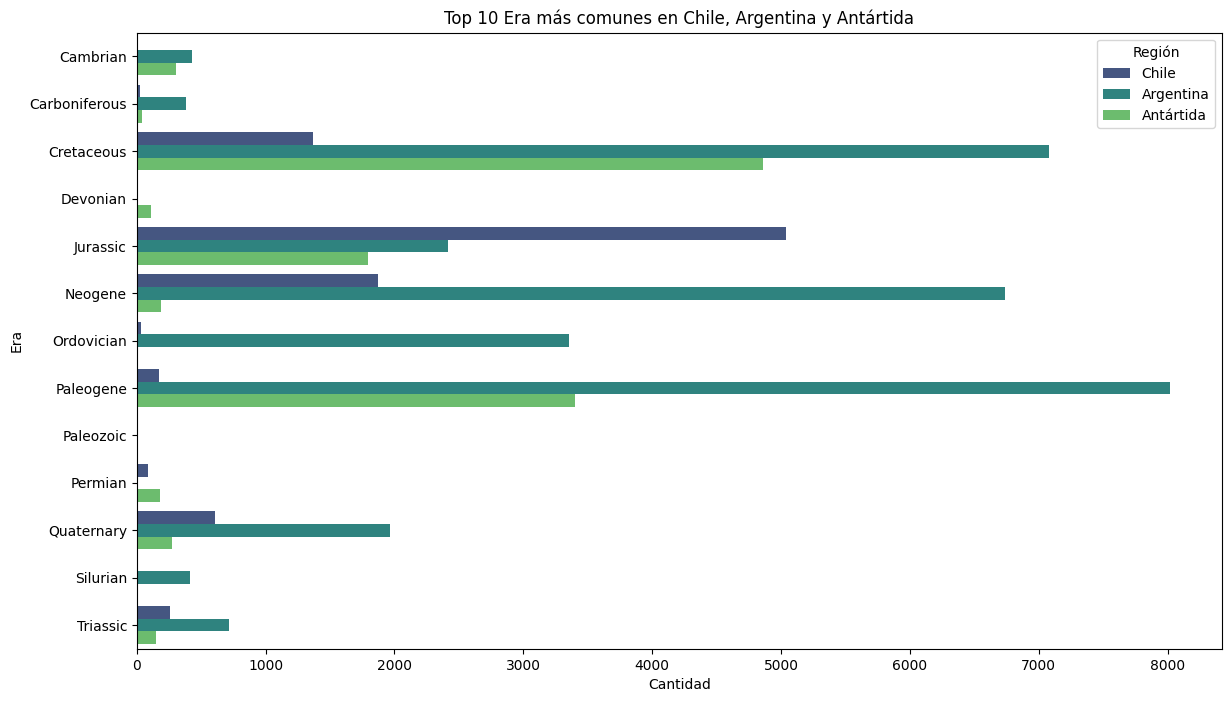

In [91]:
#Ahora hagaos lo mismo pero con era_early

# Obtener los top 10 era_early más comunes en cada región
top_10_especies_chile_era_early = chile_df['era_early'].value_counts().head(10)
top_10_especies_argentina_era_early = argentina_df['era_early'].value_counts().head(10)
top_10_especies_antartica_era_early = antartica_df['era_early'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_era_early,
    'Argentina': top_10_especies_argentina_era_early,
    'Antártida': top_10_especies_antartica_era_early
}).fillna(0)

# Graficar los datos combinados con Seaborn

combined_df_reset = combined_df.reset_index().melt(id_vars='era_early', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='era_early', hue='Región', palette='viridis')
plt.title('Top 10 Era más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Era')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Dominancia de ciertas eras**:
   - **Cretaceous**: Esta era es la más representativa en las tres regiones, indicando un período de gran actividad biológica y condiciones favorables para la fosilización. Esto sugiere ecosistemas ricos y diversos en todas las regiones durante este período.
   - **Paleogene**: Es especialmente prominente en Argentina y Antártida, reflejando un período clave para la diversificación de fauna terrestre y marina.
   - **Jurassic**: Chile y Argentina muestran una mayor representación en esta era, destacando la relevancia de ecosistemas marinos y continentales durante este tiempo.

2. **Diferencias entre regiones**:
   - **Chile**: Tiene una representación balanceada de eras geológicas, con un enfoque en el **Jurassic** y el **Cretaceous**, lo que apunta a una rica biodiversidad marina durante estos períodos.
   - **Argentina**: Destaca particularmente en el **Paleogene** y el **Cretaceous**, reflejando un fuerte componente terrestre en su registro fósil.
   - **Antártida**: Aunque comparte eras importantes como el **Cretaceous** y el **Paleogene**, también muestra una representación destacada del **Ordovician**, lo que sugiere una historia geológica única.

3. **Especificidad regional**:
   - El **Cambrian** tiene una representación exclusiva en Antártida, indicando una conexión con eventos geológicos antiguos únicos en esta región.
   - El **Neogene** es particularmente relevante en Chile y Argentina, relacionado con la diversificación de ecosistemas más modernos.

4. **Patrones generales**:
   - Las eras más recientes, como el **Quaternary**, están mejor representadas en Argentina y Chile, indicando una mayor conservación de fósiles recientes.
   - Las diferencias en la representación de eras entre las regiones reflejan sus historias geológicas y ecológicas únicas, con Antártida destacándose por su conexión con períodos más antiguos y Argentina por su registro fósil terrestre más reciente.
